# Rain Prediction Notebook

In this notebook, a ML project 'Rain Prediction' is conducted. For this purpose, a data set named 'Weather_Data.csv' is used. It has some columns that are continous and categorical type. The different columns have different features. They are given in the following picture

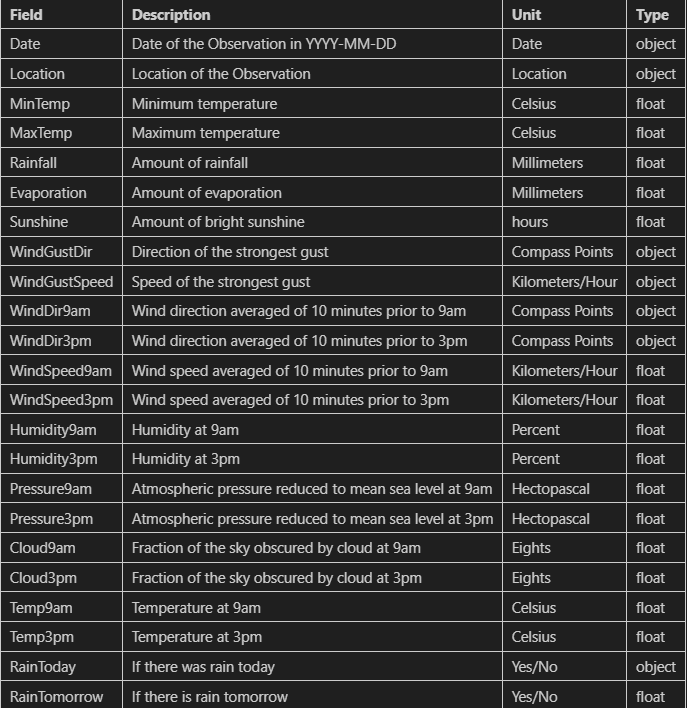

* After observing the data set closely, I can say that the column called 'RainTomorrow' is the target variable and all other columns except 'Date' are the independent variables. Now, the target variable is of **categorical type** having two levels - Yes and No. So, one thing is clear, to predict that Supervised Machine Learning process **'Regression Analysis'** must be used.

* Now the question that arises is 'Which Type of Regression Will be used?' To know that , In this notebook, I have performed various types of Regression  and Classification analysis. In this notebook, Multiple Linear Regression, KNN, Decision Tree, SVM, and Logistics Regression are used and then we check the accuracy of each mkodel 

The Machine Learning Processes that Will be used in this project are - 
* Linear Regression
* Logistic Regression
* KNN Classifier
* Decision Tree Classifier
* SVM (Support Vector Machine)

The Performance metrics that are used to know the performance of the models are - 
* MAE (Mean Absolute Error), MSE (Mean Squared Error) and R2 Value for Linear Regression
* Accuracy Score, Jaccard Index, F1 Score, Log Loss, Confusion Matrix for Logistic Regression
* Accuracy Score, Jaccard Index, F1 Score for KNN classifier and Log Loss set to Not Defined
* Accuracy Score, Jaccard Index, F1 Score for Decision Tree Classifier and Log Loss set to Not Defined
* Accuracy Score, Jaccard Index, F1 Score for SVM and Log Loss set to Not Defined


## Importing All Required Packages for this project

In [1]:
# Importing all Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## Reading the 'Weather_Data.csv' data

In [2]:
data = pd.read_csv('Weather_Data.csv')
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


## Sanity Checks through the data set

In [3]:
print('Column Names of the data frame')
print(data.columns)
print('-------------------------------------------')
print('Shape of the Data frame')
print('Number of Samples is:', data.shape[0])
print('Number of Features is:', data.shape[1])
print('-------------------------------------------')
print('Data Types of the Columns')
print(data.dtypes)
print('-------------------------------------------')
print('Missing Values in Each Column')
print(data.isnull().sum()) # So, it is confirmed that the data is completely cleaned

Column Names of the data frame
Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
-------------------------------------------
Shape of the Data frame
Number of Samples is: 3271
Number of Features is: 22
-------------------------------------------
Data Types of the Columns
Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64

## Selecting Feature subset in order to conduct the ML project

In [4]:
# I observe that the 'Date' column doesn't contribute anything to the ML project
# So, I drop the column and saved the data in the same name
data = data.drop('Date', axis = 1)
data.shape[1] # The 'Date' column is Dropped succesfully

21

## One hot Encoding the Categorical Variables

In [5]:
data_processed = pd.get_dummies(data = data , columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
data_processed = data_processed.replace(['No', 'Yes'], [0,1]) #Replacing the Values of the Target Variable
data_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41,17,20,92,84,...,False,False,False,False,False,True,False,False,False,False
1,19.5,25.6,6.0,3.4,2.7,41,9,13,83,73,...,False,False,False,False,False,False,False,False,False,False
2,21.6,24.5,6.6,2.4,0.1,41,17,2,88,86,...,False,False,False,False,False,False,False,False,False,False
3,20.2,22.8,18.8,2.2,0.0,41,22,20,83,90,...,False,False,False,False,False,False,False,False,False,False
4,19.7,25.7,77.4,4.8,0.0,41,11,6,88,74,...,False,False,False,False,False,False,False,True,False,False


## Changing the Data type of columns to float

In [6]:
data_processed = data_processed.astype(float)
data_processed.dtypes

MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
                   ...   
WindDir3pm_SSW    float64
WindDir3pm_SW     float64
WindDir3pm_W      float64
WindDir3pm_WNW    float64
WindDir3pm_WSW    float64
Length: 67, dtype: object

## Setting the Set of Independent Variables and Dependent Variable as X and y

In [7]:
X = data_processed.drop(columns = 'RainTomorrow', axis=1)
y = data_processed['RainTomorrow']

## Train-Test Splitting the Data Set using the Sklearn's train_test_split function

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 10)
print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (2616, 66)
Shape of X_test is: (655, 66)
Shape of y_train is: (2616,)
Shape of y_test is: (655,)


pandas.core.frame.DataFrame

## Build A Linear Regression Model, creating, data fitting and predicting Future values.
* The Linear Regression Model is defined by the variable mlr_model
* Check How the model is behaving, by using metrics module of sklearn
* Use MAE, MSE, R2 Score for Model accuracy judgement

In [9]:
# Model Defining
mlr_model = LinearRegression()

# Data Fitting into the Model
mlr_model.fit(X_train, y_train)

# Predicting Future Values
mlr_model_predictions = mlr_model.predict(X_test)

In [10]:
# Checking Model Performance Using MAE, MSE and R2 score
mlr_model_mae = mean_absolute_error(y_test, mlr_model_predictions)
mlr_model_mse = mean_squared_error(y_test, mlr_model_predictions)
mlr_model_r2 = r2_score(y_test, mlr_model_predictions)

# Making A table of this values to understand quickly
report1 = pd.DataFrame({'MAE_Value':[mlr_model_mae], 'MSE_Value':[mlr_model_mse], 'R2_Value':[mlr_model_r2]})
report1.index = ['Linear Regression']
report1

# The model is only 42% accurate, bad accuracy
# This happens beacause of the data type
# This is not a linear Regression Problem

,MAE_Value,MSE_Value,R2_Value
Linear Regression,0.256325,0.115723,0.427119


## Build A Binary Logistic Regression Model, creating, data fitting and predicting Future values.
* The Binary Logistics Regression Model is defined by the variable blr_model
* Check How the model is behaving, by using metrics module of sklearn
* Use accuracy, jaccard Index, F1 Score

In [12]:
# Model Defining
blr_model = LogisticRegression(solver = 'liblinear')

# Data Fitting into the Model
blr_model.fit(X_train, y_train)

# Predicting Future Values
blr_model_predictions = blr_model.predict(X_test)

# Determining the Predicted Probabilities
predict_proba = blr_model.predict_proba(X_test)

In [13]:
# Checking Model Performance Using accuracy, jaccard score, f1 score
blr_model_accuracy = accuracy_score(y_test, blr_model_predictions)
blr_model_jaccardIndex = jaccard_score(y_test, blr_model_predictions, pos_label = 0)
blr_model_f1Score = f1_score(y_test, blr_model_predictions)
blr_model_logloss = log_loss(y_test, predict_proba)

# Making A table of this values to understand quickly
report2 = pd.DataFrame({'Accuracy_Score':[blr_model_accuracy], 'Jaccard_Score':[blr_model_jaccardIndex], 
                        'F1_Score':[blr_model_f1Score], 'Log_Loss':[blr_model_logloss]})
report2.index = ['Binary Logistics Regression']
report2

# The Accuracy of the Binary Logiostics Regression Model is approx 84%, much better than previous model.
# The Jaccard Score is close to 81%
# The F-1 Score is 68%

,Accuracy_Score,Jaccard_Score,F1_Score,Log_Loss
Binary Logistics Regression,0.836641,0.802218,0.680597,0.35718


## Build A classification model with KNN algorithm - creating data fitting and predicting Future values.
* The KNN algorithm Model is defined by the variable knn_model, set neighbors to 4
* Check How the model is behaving, by using metrics module of sklearn
* Use accuracy, jaccard Index, F1 Score

In [20]:
# Converting the Train Test split into arrays
X_train_arry = X_train.values
X_test_arry = X_test.values
y_train_arry = y_train.values
y_test_arry = y_test.values

# Defining the KNN Model
KNN_model = KNeighborsClassifier(n_neighbors = 4)

# Fitting the Training data into the model
KNN_model.fit(X_train_arry, y_train_arry)

# Predicting Future Values
KNN_model_predictions = KNN_model.predict(X_test_arry)

In [28]:
# Judging the Performance of the KNN model
KNN_model_accuracy = accuracy_score(y_test_arry, KNN_model_predictions)
KNN_model_JaccardIndex = jaccard_score(y_test_arry, KNN_model_predictions, pos_label=0)
KNN_model_F1score = f1_score(y_test_arry, KNN_model_predictions, average='weighted')

# Making A table of this values to understand quickly
report3 = pd.DataFrame({'Accuracy_Score':[KNN_model_accuracy], 'Jaccard_Score':[KNN_model_JaccardIndex], 
                        'F1_Score':[KNN_model_F1score], 'Log_Loss':['Not Defined']})
report3.index = ['KNN Model K = 4']
report3

,Accuracy_Score,Jaccard_Score,F1_Score,Log_Loss
KNN Model K = 4,0.818321,0.790123,0.802375,Not Defined


## Decision Tree Classifier, model Building, Data Fitting and Predictions
* Use the sklern's tree modules's DecisionTreeClassifier() function 
* Use max_depth parameter 5 and criterion set to entropy
* Use accuracy, jaccard Index, F1 Score from sklearn's metrics module to know performance

In [25]:
# Defining the Model
Tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)

# Data fitting in the model
Tree_model.fit(X_train, y_train)

# Predicting the Future Values
Tree_model_predictions = Tree_model.predict(X_test)

In [27]:
# Judging the Performance of the KNN model
Tree_model_accuracy = accuracy_score(y_test , Tree_model_predictions)
Tree_model_JaccardIndex = jaccard_score(y_test , Tree_model_predictions , pos_label=0)
Tree_model_F1score = f1_score(y_test , Tree_model_predictions)

# Making A table of this values to understand quickly
report4 = pd.DataFrame({'Accuracy_Score':[Tree_model_accuracy], 'Jaccard_Score':[Tree_model_JaccardIndex], 
                        'F1_Score':[Tree_model_F1score], 'Log_Loss':['Not Defined']})
report4.index = ['Decision Tree Depth 8']
report4

,Accuracy_Score,Jaccard_Score,F1_Score,Log_Loss
Decision Tree Depth 8,0.79542,0.760286,0.588957,Not Defined


## SVM Model Building, Data Fitting and Predicting Future Values
* Set the kernel to linear
* Accuracy Score, Jaccard Index, F1 Score for Performance Measure

In [29]:
# Defining the Model
SVM_model = svm.SVC(kernel = 'linear')

# Fitting the Training data in the model
SVM_model.fit(X_train, y_train)

# Predicting the Future Values
SVM_model_predictions = SVM_model.predict(X_test)

In [30]:
# Calculating the Performance of the SVM model
SVM_model_accuracy = accuracy_score(y_test , SVM_model_predictions)
SVM_model_JaccardIndex = jaccard_score(y_test , SVM_model_predictions , pos_label=0)
SVM_model_F1score = f1_score(y_test , SVM_model_predictions)

# Making A table of this values to understand quickly
report5 = pd.DataFrame({'Accuracy_Score':[SVM_model_accuracy], 'Jaccard_Score':[SVM_model_JaccardIndex], 
                        'F1_Score':[SVM_model_F1score], 'Log_Loss':['Not Defined']})
report5.index = ['SVM Model']
report5

,Accuracy_Score,Jaccard_Score,F1_Score,Log_Loss
SVM Model,0.844275,0.809701,0.7,Not Defined


## Making the Final Report
* Use Accuracy Score, F1 Score, Jaccard Index, Log Loss to make the final report
* Use report2, report3, report4 and report5
* Performance Result of the Models - Logistic Regression, KNN, Decision Tree and SVM
* Store the final result in a data frame called Final_Report

In [33]:
Final_Report = pd.concat([report2, report3, report4, report5], axis = 0)
Final_Report

,Accuracy_Score,Jaccard_Score,F1_Score,Log_Loss
Binary Logistics Regression,0.836641,0.802218,0.680597,0.35718
KNN Model K = 4,0.818321,0.790123,0.802375,Not Defined
Decision Tree Depth 8,0.795420,0.760286,0.588957,Not Defined
SVM Model,0.844275,0.809701,0.700000,Not Defined


## Plotting the Confusion Matrix for The Logistics Regression Model
* y_test is the actual true values
* blr_model_predictions are the predicted values

In [35]:
from sklearn.metrics import classification_report
import itertools

In [36]:
# Defining the plot_confusion_matrix function in order to make the Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, blr_model_predictions, labels=[1,0]))

[[114  70]
 [ 37 434]]


Confusion matrix, without normalization
[[114  70]
 [ 37 434]]


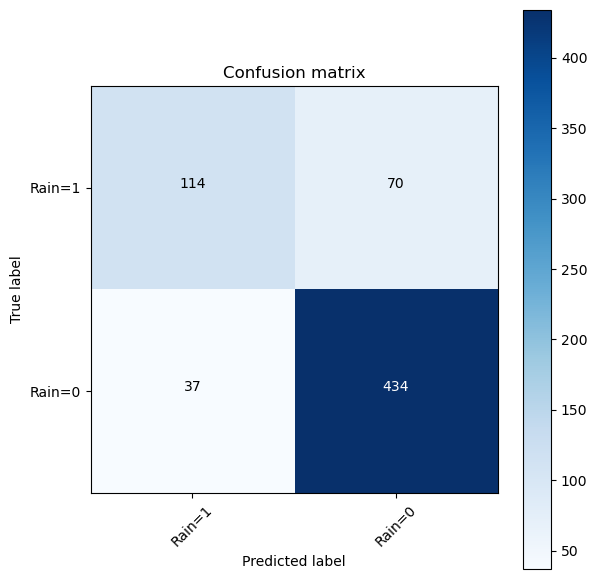

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test , blr_model_predictions , labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize = (6,6))
plot_confusion_matrix(cnf_matrix, classes=['Rain=1','Rain=0'], normalize= False , title='Confusion matrix')

In [38]:
# Performance Measure from this confusion matrix
confmatrix_report = classification_report(y_test, blr_model_predictions)
print(confmatrix_report)

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       471
         1.0       0.75      0.62      0.68       184

    accuracy                           0.84       655
   macro avg       0.81      0.77      0.79       655
weighted avg       0.83      0.84      0.83       655

